In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Load dataset
df = pd.read_csv('iris.csv')
df

,sepallength,sepalwidth,petallength,petalwidth,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
x = df.iloc[: ,:-1]

In [4]:
# Elbow Method to find optimal k
wcss = []

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [5]:
wcss

[680.8243999999996,
 152.36870647733915,
 78.94506582597728,
 57.317873214285726,
 46.535582051282034,
 39.251830892636775,
 37.682149999999986,
 32.494205468656276,
 28.099259436618144,
 27.006507092471054]

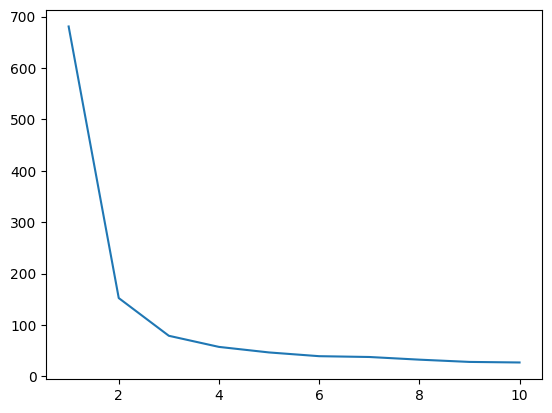

In [6]:
plt.plot(range(1,11), wcss)

In [7]:
# K-Means Clustering for k=3
x=x.values
mdl = KMeans(n_clusters=3)
y_pred = mdl.fit_predict(x)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [8]:
mdl.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

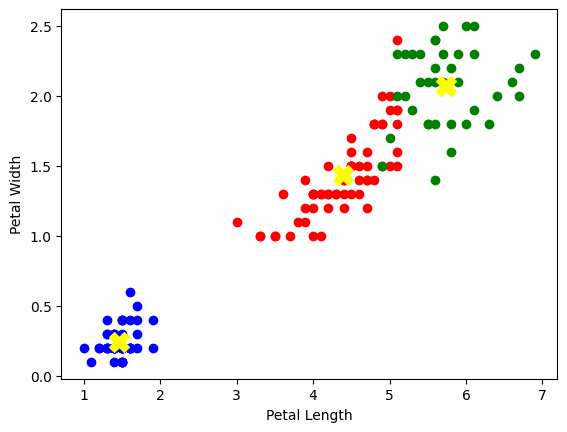

In [9]:
plt.scatter(x[y_pred == 0, 2], x[y_pred == 0, 3], c='red')
plt.scatter(x[y_pred == 1, 2], x[y_pred == 1, 3], c='blue')
plt.scatter(x[y_pred == 2, 2], x[y_pred == 2, 3], c='green')
plt.scatter(mdl.cluster_centers_[:, 2], mdl.cluster_centers_[:, 3], c='yellow', marker='X', s=200)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()